<a href="https://colab.research.google.com/github/Bahrombekk/OpenCV/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Shia_LaBeouf_Homework_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Naxalov/ComputerVision/master/OpenCV/Image%20Processing/ShiaLaBeouf_green.jpg

--2023-05-02 10:29:08--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/OpenCV/Image%20Processing/ShiaLaBeouf_green.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33078 (32K) [image/jpeg]
Saving to: ‘ShiaLaBeouf_green.jpg’

ShiaLaBeouf_green.j 100%[===================>]  32.30K  --.-KB/s    in 0.004s  

2023-05-02 10:29:08 (8.64 MB/s) - ‘ShiaLaBeouf_green.jpg’ saved [33078/33078]



In [ ]:
!wget https://raw.githubusercontent.com/JavohirJalilov/ComputerVision/master/image/codeschool.jpg

--2023-05-02 10:29:08--  https://raw.githubusercontent.com/JavohirJalilov/ComputerVision/master/image/codeschool.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604105 (590K) [image/jpeg]
Saving to: ‘codeschool.jpg’

codeschool.jpg      100%[===================>] 589.95K  --.-KB/s    in 0.05s   

2023-05-02 10:29:08 (12.6 MB/s) - ‘codeschool.jpg’ saved [604105/604105]



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [ ]:
# utility 
def show(img):
  plt.figure(figsize=(5,5),dpi=200)
  plt.imshow(img,cmap='gray')
  # plt.axis('off')
  plt.show()

In [ ]:
def get_img(name):
  """
  Get image
  Args:
    filename(str): file path
  Returns:
    numpy.ndarray: RGB and Grayscale image
  """
  img=cv2.imread(name)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  
  # write code here
  return gray,img

In [ ]:
gray, img = get_img('/content/ShiaLaBeouf_green.jpg')

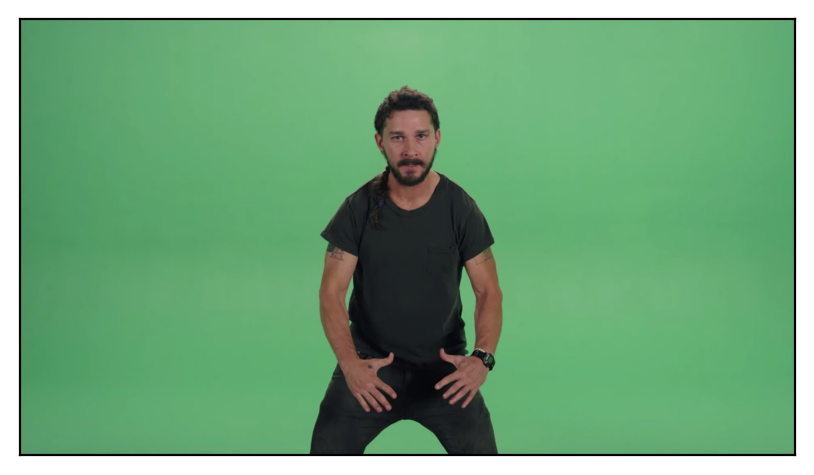

In [ ]:
show(img)

In [ ]:
def threshold_img(img):
  """
  threshold image for green, input RGB image, convert HSV

  Args:
    img(numpy.ndarray): RGB image
  Returns:
    numpy.ndarray: Binary image
  """
  # write code here
  H,S,V=133//2,38*255//100,73*255//100
  HSV=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
  lower = np.array([H-10, 60, 125], dtype=np.uint8)
  upper = np.array([[H+10, 245, 255]], dtype=np.uint8)
  mask=cv2.inRange(HSV,lower,upper)
  return mask


In [ ]:
th = threshold_img(img)

In [ ]:
school_gray, school_rgb = get_img('/content/codeschool.jpg')

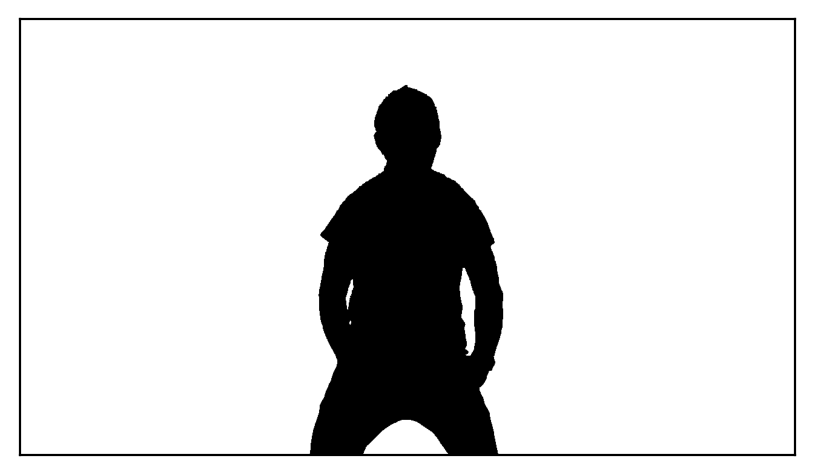

In [ ]:
show(th)

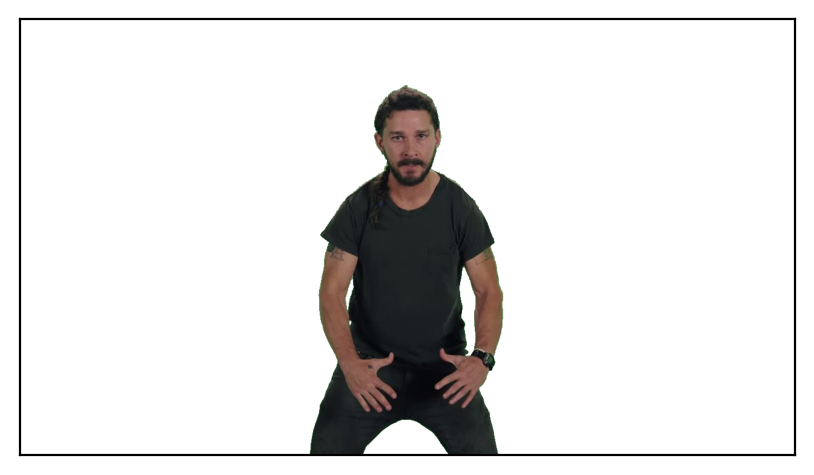

In [ ]:
 t=cv2.cvtColor(th,cv2.COLOR_GRAY2RGB)
 #b=cv2.bitwise_or(t,img)
 #show(b)
 a1=cv2.bitwise_or(t,img)
 show(a1)

In [ ]:
school=cv2.resize(school_rgb,(1280,720))
b=cv2.bitwise_and(school,a1)
c=cv2.bitwise_and(b,img)

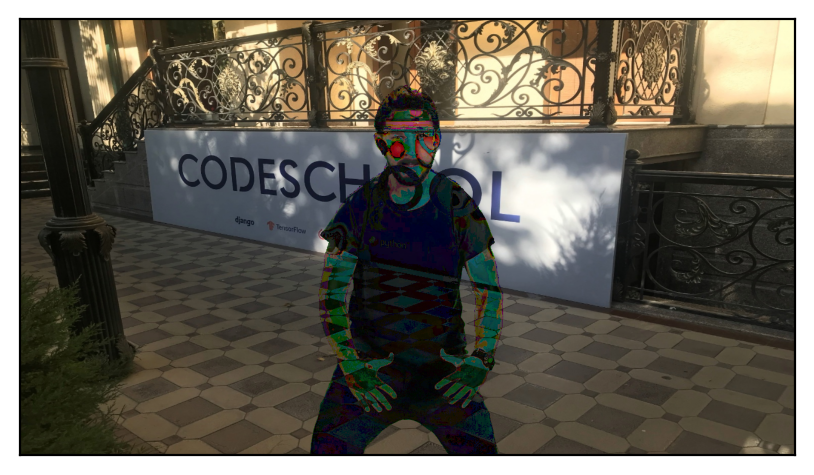

In [ ]:
show(b)

In [ ]:
show()

TypeError: ignored

In [ ]:
a=cv2.bitwise_and(school,t)

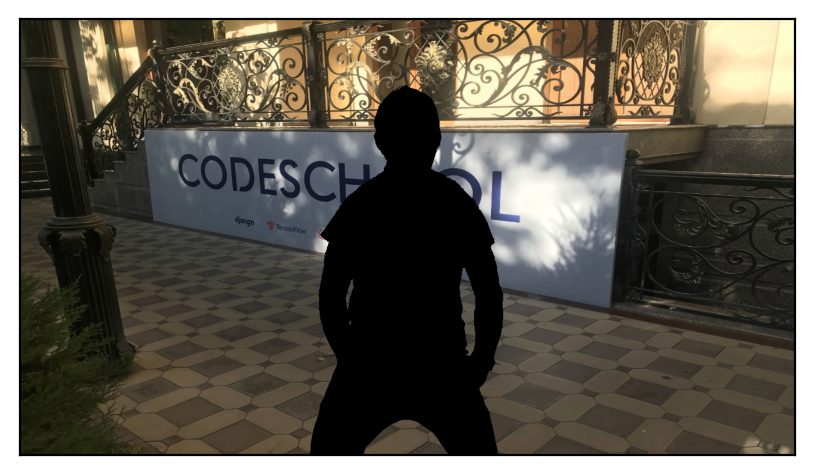

In [ ]:
show(a)

In [ ]:
def add_image(codeschool_img_rgb, shia_threshold_img, shia_rgb_img):
  """
  Putting a picture of CODESCHOOL on Shia LaBeouf's background

  Args:
    reg_img_rgb(numpy.ndarray): RGB image
    shialabeouf_img(numpy.ndarray): RGB image
  Returns:
    numpy.ndarray: result RGB image
  """
  t=cv2.cvtColor(shia_threshold_img,cv2.COLOR_GRAY2RGB)
  b=cv2.bitwise_or(t,shia_rgb_img)
  school=cv2.resize(codeschool_img_rgb.shape,(1280,720))
  add_img=cv2.addWeighted(b,0.9,school,0.9,0)
  #write code here

  return add_img


In [ ]:
result_img = add_image(school_rgb, th, img)

In [ ]:
show(result_img)

NameError: ignored